# AirBNB Price Prediction with Logistic Regression

We will predict the price (`price_gte_150` column) of an AirBNB dataset used last week.

## 1. Setup

In [111]:
# Common imports
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

np.random.seed(1)

# 2. Load the data

We will use the AirBNB data that we cleaned in last class (the original, not the one that you altered for last weeks exercise).

In [112]:
# Uncomment the following snippet of code to debug problems with finding the .csv file path
# This snippet of code will exit the program and print the current working directory.
import os
print(os.getcwd())

c:\Users\surya\OneDrive\Documents\USF\Classes\Semester-2\DSP\Week-3 Codes


In [113]:
X_train = pd.read_csv("./data/airbnb_train_X_price_gte_150.csv")
X_test = pd.read_csv("./data/airbnb_test_X_price_gte_150.csv")
y_train = pd.read_csv("./data/airbnb_train_y_price_gte_150.csv")
y_test = pd.read_csv("./data/airbnb_test_y_price_gte_150.csv")

## 3. Model the data

First, we will create a dataframe to hold all the results of our models.

In [114]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

### 3.1 Fit and test a Logistic Regression model

In [115]:
log_reg_model = LogisticRegression(penalty= 'none', max_iter=900)
_ = log_reg_model.fit(X_train, np.ravel(y_train))

In [116]:
model_preds = log_reg_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"default logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.866917,0.852995,0.885122,0.868762


### 3.2 Change to liblinear solver

In [117]:
log_reg_liblin_model = LogisticRegression(solver='liblinear').fit(X_train, np.ravel(y_train))

In [118]:
model_preds = log_reg_liblin_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"liblinear logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454


### 3.3 L2 Regularization

In [119]:
log_reg_L2_model = LogisticRegression(penalty='l2', max_iter=1000)
_ = log_reg_L2_model.fit(X_train, np.ravel(y_train))

In [120]:
model_preds = log_reg_L2_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"L2 logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454
0,L2 logistic,0.861293,0.850091,0.875706,0.862709


### 3.4 L1 Regularization

In [121]:
log_reg_L1_model = LogisticRegression(solver='liblinear', penalty='l1')
_ = log_reg_L1_model.fit(X_train, np.ravel(y_train))

In [122]:
model_preds = log_reg_L1_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"L1 logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454
0,L2 logistic,0.861293,0.850091,0.875706,0.862709
0,L1 logistic,0.858482,0.845455,0.875706,0.860315


3.5 Elastic Net Regularization

In [123]:
log_reg_elastic_model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=1000)
_ = log_reg_elastic_model.fit(X_train, np.ravel(y_train))

In [124]:
model_preds = log_reg_elastic_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Elestic logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

# 4.0 SVM Models

### 4.1 SVM Classification using Linear Kernal

In [125]:
svm_lin_model = SVC(kernel="linear")
_ = svm_lin_model.fit(X_train, np.ravel(y_train))

In [126]:
model_preds = svm_lin_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"linear svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454
0,L2 logistic,0.861293,0.850091,0.875706,0.862709
0,L1 logistic,0.858482,0.845455,0.875706,0.860315
0,Elestic logistic,0.859419,0.846995,0.875706,0.861111
0,linear svm,0.853796,0.828371,0.890772,0.858439


### 4.2 SVM Classification using rbf Kernal

In [127]:
svm_rbf_model = SVC(kernel="rbf", C=10, gamma='scale')
_ = svm_rbf_model.fit(X_train, np.ravel(y_train))

In [128]:
model_preds = svm_rbf_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"rbf svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454
0,L2 logistic,0.861293,0.850091,0.875706,0.862709
0,L1 logistic,0.858482,0.845455,0.875706,0.860315
0,Elestic logistic,0.859419,0.846995,0.875706,0.861111
0,linear svm,0.853796,0.828371,0.890772,0.858439
0,rbf svm,0.864105,0.853480,0.877589,0.865367


### 4.3 SVM Classification using poly Kernal

In [129]:
svm_poly_model = SVC(kernel="poly", degree=3, coef0=1, C=10)
_ = svm_poly_model.fit(X_train, np.ravel(y_train))

In [130]:
model_preds = svm_poly_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"poly svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454
0,L2 logistic,0.861293,0.850091,0.875706,0.862709
0,L1 logistic,0.858482,0.845455,0.875706,0.860315
0,Elestic logistic,0.859419,0.846995,0.875706,0.861111
0,linear svm,0.853796,0.828371,0.890772,0.858439
0,rbf svm,0.864105,0.853480,0.877589,0.865367
0,poly svm,0.867854,0.855839,0.883239,0.869323


Sorted by accuracy, the best models are:

In [131]:
performance.sort_values(by=['Accuracy'])

,model,Accuracy,Precision,Recall,F1
0,linear svm,0.853796,0.828371,0.890772,0.858439
0,L1 logistic,0.858482,0.845455,0.875706,0.860315
0,Elestic logistic,0.859419,0.846995,0.875706,0.861111
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454
0,L2 logistic,0.861293,0.850091,0.875706,0.862709
0,rbf svm,0.864105,0.853480,0.877589,0.865367
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,poly svm,0.867854,0.855839,0.883239,0.869323


Sorted by Precision, the best models are:

In [132]:
performance.sort_values(by=['Precision'])

,model,Accuracy,Precision,Recall,F1
0,linear svm,0.853796,0.828371,0.890772,0.858439
0,L1 logistic,0.858482,0.845455,0.875706,0.860315
0,Elestic logistic,0.859419,0.846995,0.875706,0.861111
0,L2 logistic,0.861293,0.850091,0.875706,0.862709
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,rbf svm,0.864105,0.853480,0.877589,0.865367
0,poly svm,0.867854,0.855839,0.883239,0.869323


Sorted by Recall, the best models are:

In [133]:
performance.sort_values(by=['Recall'])

,model,Accuracy,Precision,Recall,F1
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454
0,L2 logistic,0.861293,0.850091,0.875706,0.862709
0,L1 logistic,0.858482,0.845455,0.875706,0.860315
0,Elestic logistic,0.859419,0.846995,0.875706,0.861111
0,rbf svm,0.864105,0.853480,0.877589,0.865367
0,poly svm,0.867854,0.855839,0.883239,0.869323
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,linear svm,0.853796,0.828371,0.890772,0.858439


Sorted by F1, the best models are:

In [134]:
performance.sort_values(by=['F1'])

,model,Accuracy,Precision,Recall,F1
0,linear svm,0.853796,0.828371,0.890772,0.858439
0,L1 logistic,0.858482,0.845455,0.875706,0.860315
0,Elestic logistic,0.859419,0.846995,0.875706,0.861111
0,liblinear logistic,0.861293,0.851376,0.873823,0.862454
0,L2 logistic,0.861293,0.850091,0.875706,0.862709
0,rbf svm,0.864105,0.853480,0.877589,0.865367
0,default logistic,0.866917,0.852995,0.885122,0.868762
0,poly svm,0.867854,0.855839,0.883239,0.869323


# 5.0 Summary

 We have added the SVM models to the current lot and have ordered them in ascending order depending on the metric. Now, thinking in terms of choosing which model is performing well, We first have to define the business problem and the impact parameters. 

 Let us suppose that we are from a AIRBNB company and trying to market our staying rooms in accordance with the price points. Now, there is a chance of making the wrong call in 2 ways. 
 
 i. When the price is below 150 and we estimated it above 150
 
 ii. When the price is above 150 and we estimated it below 150

 In this business problem, False negative is when The Cost price for AIRBNB is greater that 150 and the model predicted that the price is below 150. This will have a huge impact on the business as the money out of pocket is always more than the price they fixed. This will result them always operating in losses. 

 So, we should choose a model that will reduce the True Negative. So let's go with Recall as the parameter. 

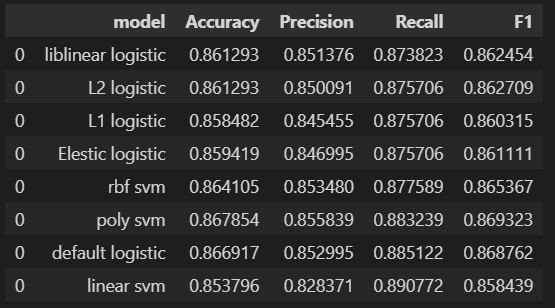

 The above image has the organized order of recall values. Of all, LibLinear Logistic Regression has the highest recall value. If we consider only SVM models, RBF SVM is the best performing model. It has a recall value of 0.877.